<a href="https://colab.research.google.com/github/ChahineBA/Time_Series_Air_Passengers/blob/main/Time_Series_Air_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quantmod’




In [ ]:
install.packages("car")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘lme4’




In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’




In [ ]:
#Libraries Used:
library(readr)
library(tseries)
library(ggplot2)
library(ggfortify)
library(lmtest)
library(stats)
library(stringr)
library(car)
library(forecast)

Registered S3 methods overwritten by 'forecast':
  method                 from     
  autoplot.Arima         ggfortify
  autoplot.acf           ggfortify
  autoplot.ar            ggfortify
  autoplot.bats          ggfortify
  autoplot.decomposed.ts ggfortify
  autoplot.ets           ggfortify
  autoplot.forecast      ggfortify
  autoplot.stl           ggfortify
  autoplot.ts            ggfortify
  fitted.ar              ggfortify
  fortify.ts             ggfortify
  residuals.ar           ggfortify



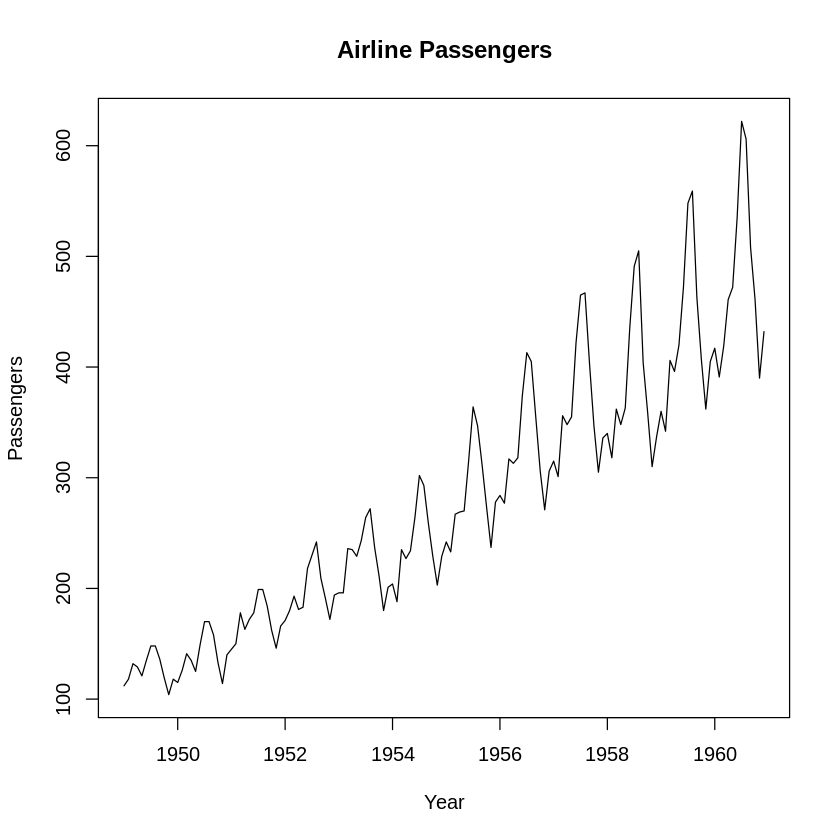

In [ ]:
# Load the dataset
mydata <- read.csv("/content/AirPassengers.csv")

# Convert the dataset into a time series object
passenger_ts <- ts(mydata$X.Passengers, start = c(1949, 1), frequency = 12)

# Plot the time series
plot(passenger_ts, main = "Airline Passengers", ylab = "Passengers", xlab = "Year")

In [ ]:
#Levene Test For homogeneity
mydata$Year <- factor(str_sub(mydata$Month,1,4))
leveneTest(passenger_ts ~ Year, data = mydata)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,11,2.727325,0.003316019
,132,NA,NA


In [ ]:
# Perform time series decomposition
passenger_dc <- decompose(passenger_ts, type = "multiplicative")

In [ ]:
# Perform time series decomposition
passenger_dc <- decompose(passenger_ts, type = "multiplicative")
# Convert decomposed components to a data frame
season <- as.data.frame(matrix(passenger_dc$seasonal,nrow=25,ncol=12,byrow=TRUE)[1:5,])
# Use autoplot to plot the decomposed components
colnames(season) <- c("January", "February", "March", "April", "May", "June", "July",
                      "August", "September", "October", "November", "December")
autoplot (passenger_dc)

Warning message in matrix(passenger_dc$seasonal, nrow = 25, ncol = 12, byrow = TRUE):
“data length [144] is not a sub-multiple or multiple of the number of rows [25]”


Warning message:
“Removed 24 rows containing missing values (`geom_line()`).”


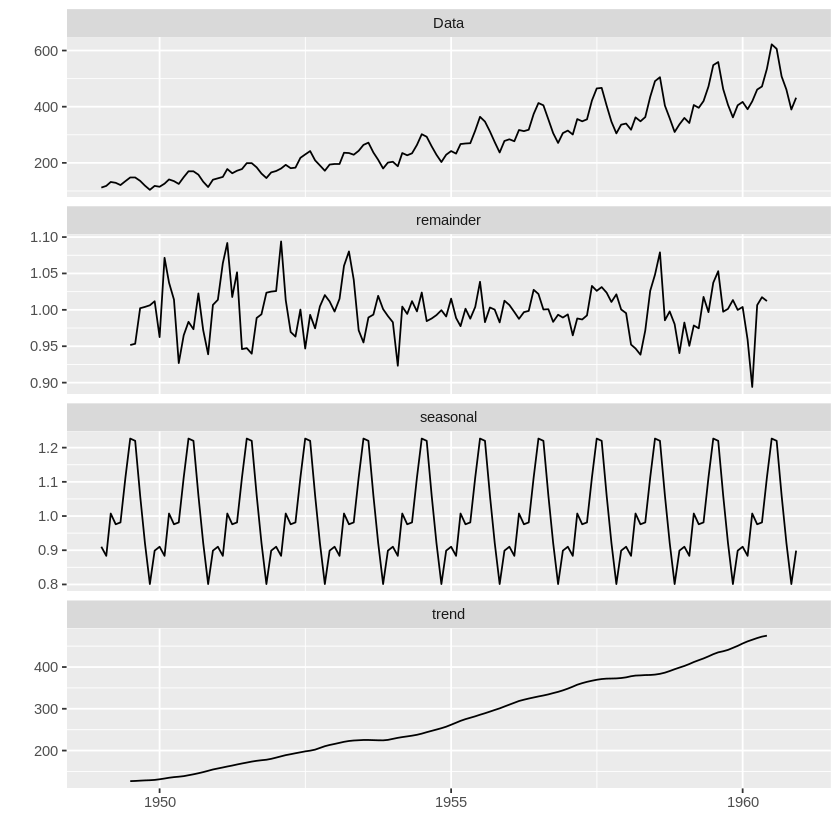

In [ ]:
# Use autoplot to plot the decomposed components
colnames(season) <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
autoplot (passenger_dc)

In [ ]:
season

January,February,March,April,May,June,July,August,September,October,November,December
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9102304,0.8836253,1.007366,0.975906,0.981378,1.112776,1.226556,1.219911,1.060492,0.9217572,0.8011781,0.8988244
0.9102304,0.8836253,1.007366,0.975906,0.981378,1.112776,1.226556,1.219911,1.060492,0.9217572,0.8011781,0.8988244
0.9102304,0.8836253,1.007366,0.975906,0.981378,1.112776,1.226556,1.219911,1.060492,0.9217572,0.8011781,0.8988244
0.9102304,0.8836253,1.007366,0.975906,0.981378,1.112776,1.226556,1.219911,1.060492,0.9217572,0.8011781,0.8988244
0.9102304,0.8836253,1.007366,0.975906,0.981378,1.112776,1.226556,1.219911,1.060492,0.9217572,0.8011781,0.8988244


In [ ]:
# Split the data into training and test sets
train_data <- window (passenger_ts, start = c(1949, 1), end =c(1959, 12))
test_data <- window (passenger_ts, start = c(1960, 1))

In [ ]:
#Simple exponential smoothing
passenger_ses = ses(train_data,h=12)
summary(passenger_ses)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = train_data, h = 12) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 112.015 

  sigma:  31.4533

     AIC     AICc      BIC 
1558.920 1559.107 1567.568 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 2.219773 31.21412 23.90229 0.4135676 8.911792 0.7849683 0.2863262

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1960       404.9957 364.6867 445.3047 343.3483 466.6431
Feb 1960       404.9957 347.9930 461.9984 317.8175 492.1739
Mar 1960       404.9957 335.1830 474.8084 298.2264 511.7649
Apr 1960       404.9957 324.3837 485.6077 281.7102 528.2812
May 1960       404.9957 314.8691 495.1223 267.1590 542.8324
Jun 1960       404.9957 306.2673 503.7241 254.0037 555.9877
Jul 1960       404.9957 298.3571 511.6343 241.9061 568.0853
Aug 1960       404.9957 290.9945 518.9969 

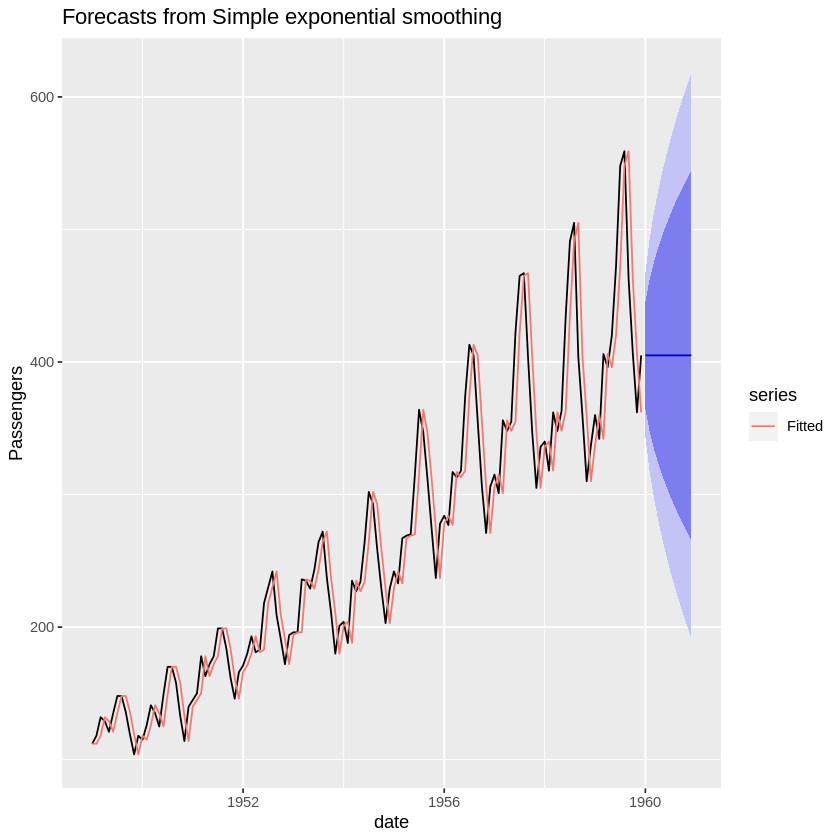

In [ ]:
autoplot (passenger_ses) + autolayer (fitted (passenger_ses), series="Fitted")+ ylab ("Passengers") + xlab ("date")

In [ ]:
#Double Holt smoothing
passenger_sh <- holt(train_data,h=12)
summary(passenger_sh)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = train_data, h = 12) 

  Smoothing parameters:
    alpha = 0.9996 
    beta  = 1e-04 

  Initial states:
    l = 120.1255 
    b = 2.0887 

  sigma:  31.6347

     AIC     AICc      BIC 
1562.391 1562.868 1576.805 

Error measures:
                     ME     RMSE     MAE        MPE     MAPE     MASE      ACF1
Training set 0.06902756 31.15172 23.8295 -0.5842125 8.965372 0.782578 0.2860526

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1960       407.0734 366.5319 447.6149 345.0705 469.0763
Feb 1960       409.1630 351.8371 466.4888 321.4906 496.8353
Mar 1960       411.2525 341.0441 481.4610 303.8780 518.6271
Apr 1960       413.3421 332.2710 494.4132 289.3546 537.3297
May 1960       415.4317 324.7887 506.0747 276.8052 554.0582
Jun 1960       417.5213 318.2232 516.8194 265.6580 569.3846
Jul 1960       419.6109 312.3524 526.8694 255.5731 583.6486
Aug 1960       421.7005 307.0314 

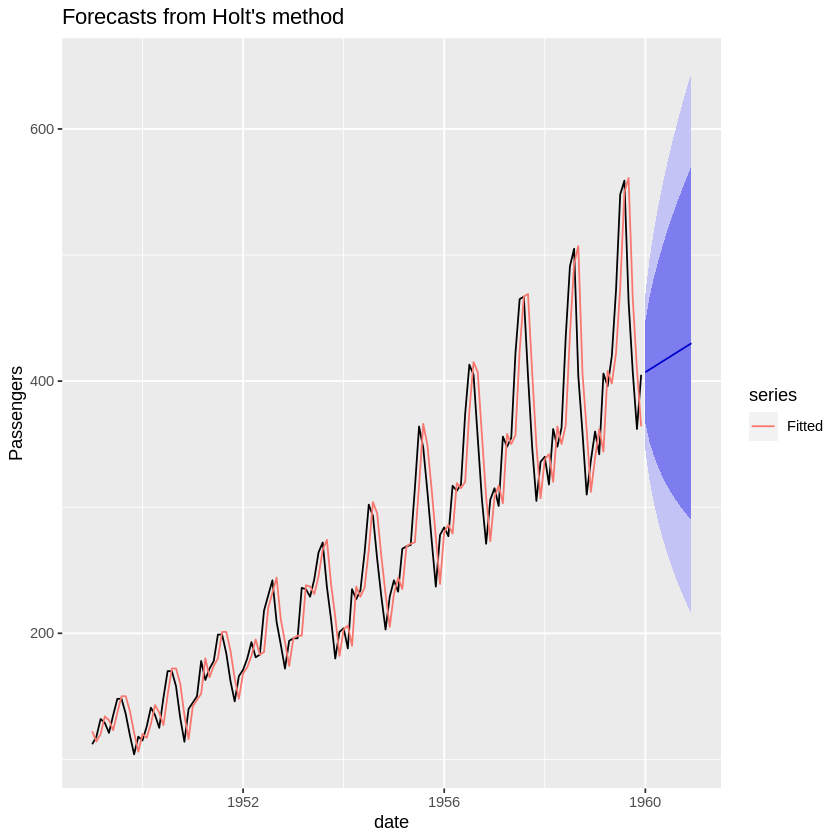

In [ ]:
autoplot (passenger_sh) + autolayer (fitted (passenger_sh), series="Fitted")+ ylab ("Passengers") + xlab ("date")

In [ ]:
#Hold-Winters:
passenger_hw <- hw(train_data,h=12,seasonal ="multiplicative")
summary(passenger_hw)


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(y = train_data, h = 12, seasonal = "multiplicative") 

  Smoothing parameters:
    alpha = 0.3392 
    beta  = 0.0105 
    gamma = 0.6534 

  Initial states:
    l = 122.569 
    b = 1.51 
    s = 0.9296 0.7992 0.9096 1.0615 1.1326 1.177
           1.0374 0.9334 1.0075 1.0984 0.9852 0.9288

  sigma:  0.0418

     AIC     AICc      BIC 
1270.460 1275.829 1319.468 

Error measures:
                   ME     RMSE      MAE       MPE    MAPE      MASE      ACF1
Training set 1.369382 9.949946 7.533284 0.2993092 2.99775 0.2473985 0.3047973

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1960       416.6188 394.3272 438.9105 382.5267 450.7110
Feb 1960       393.6628 371.3633 415.9624 359.5587 427.7670
Mar 1960       462.3467 434.7187 489.9747 420.0934 504.6001
Apr 1960       448.5228 420.3370 476.7085 405.4164 491.6291
May 1960       472.2089 441

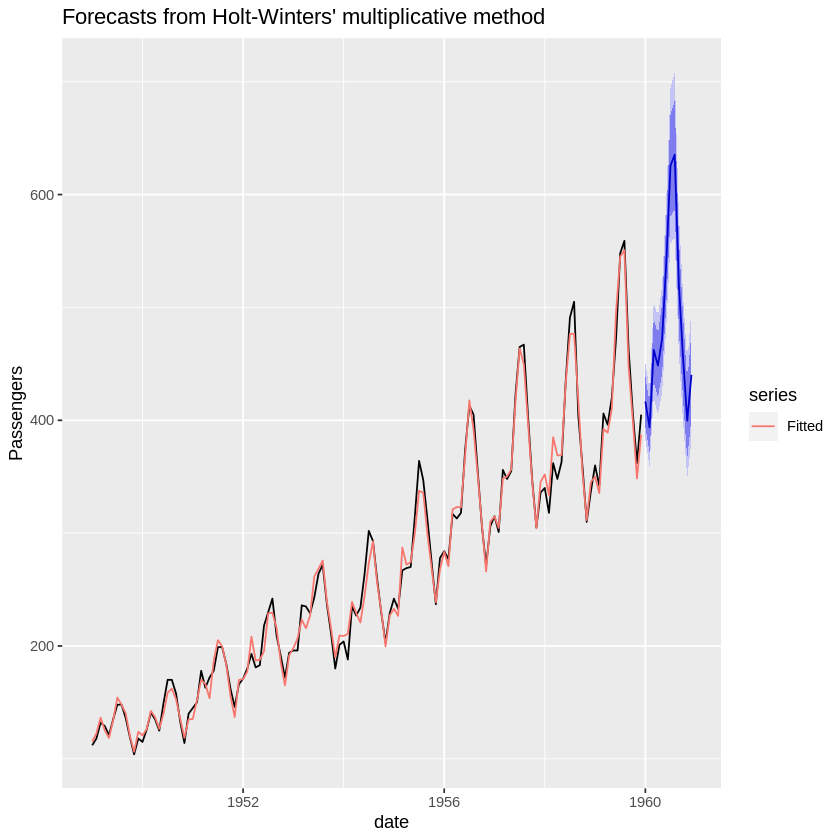

In [ ]:
autoplot (passenger_hw) + autolayer (fitted (passenger_hw), series="Fitted")+ ylab ("Passengers") + xlab ("date")

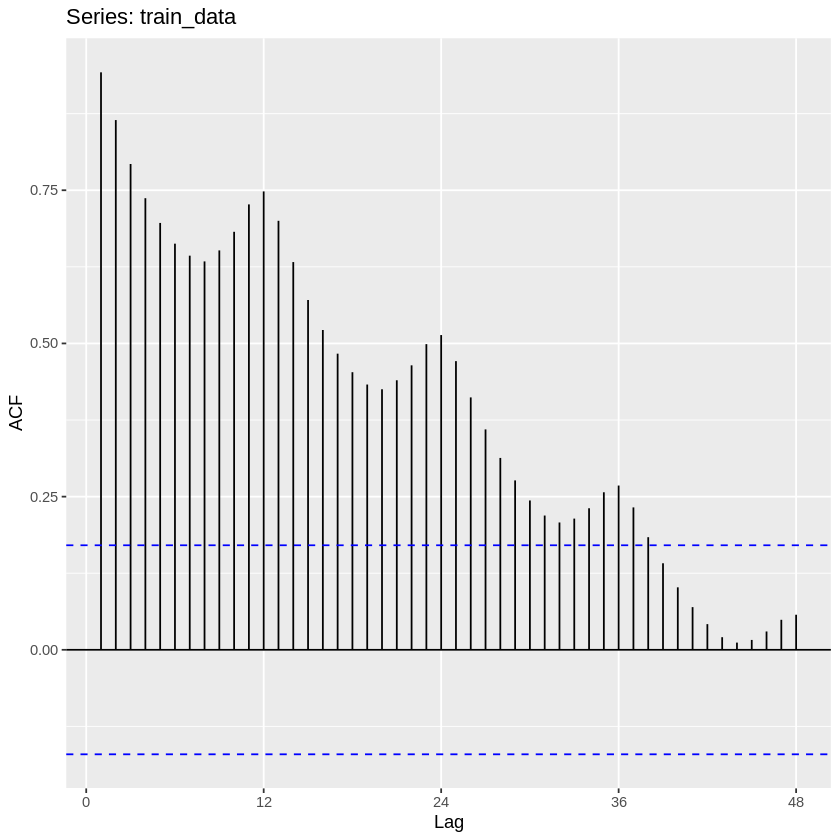

In [ ]:
#Verify the Trend of the Series
ggAcf(train_data,lag= 48)

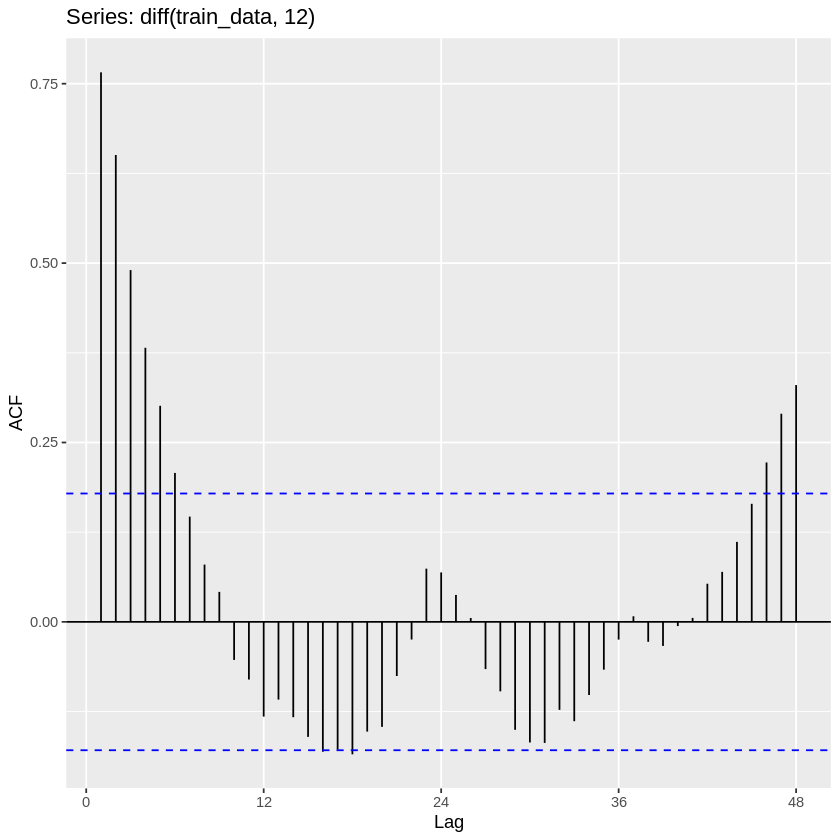

In [ ]:
ggAcf(diff(train_data,12),lag= 48)

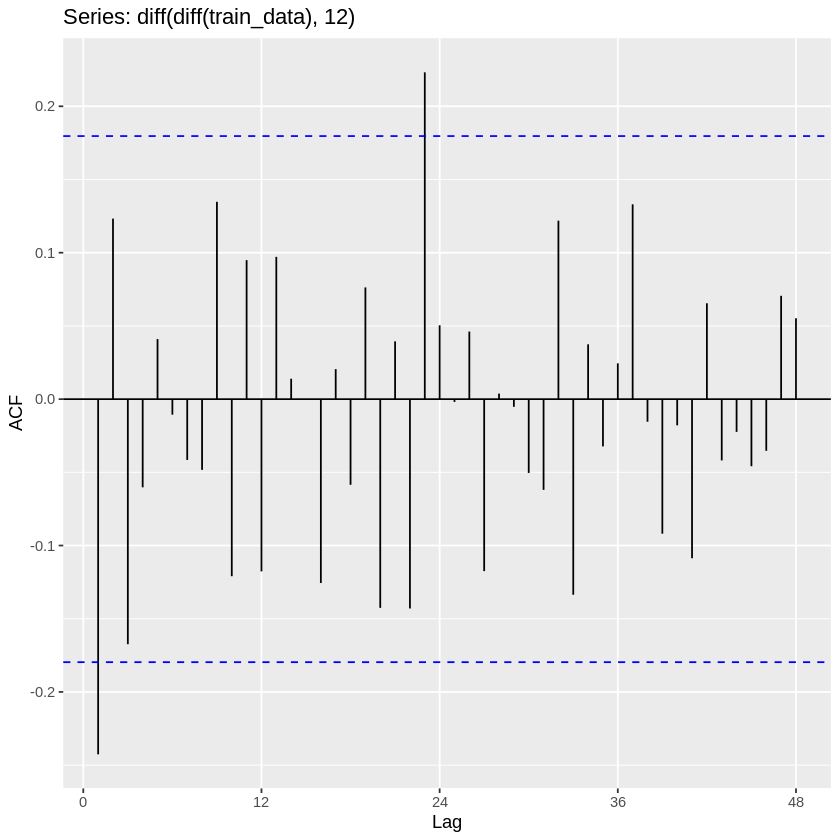

In [ ]:
ggAcf(diff(diff(train_data),12),lag= 48)

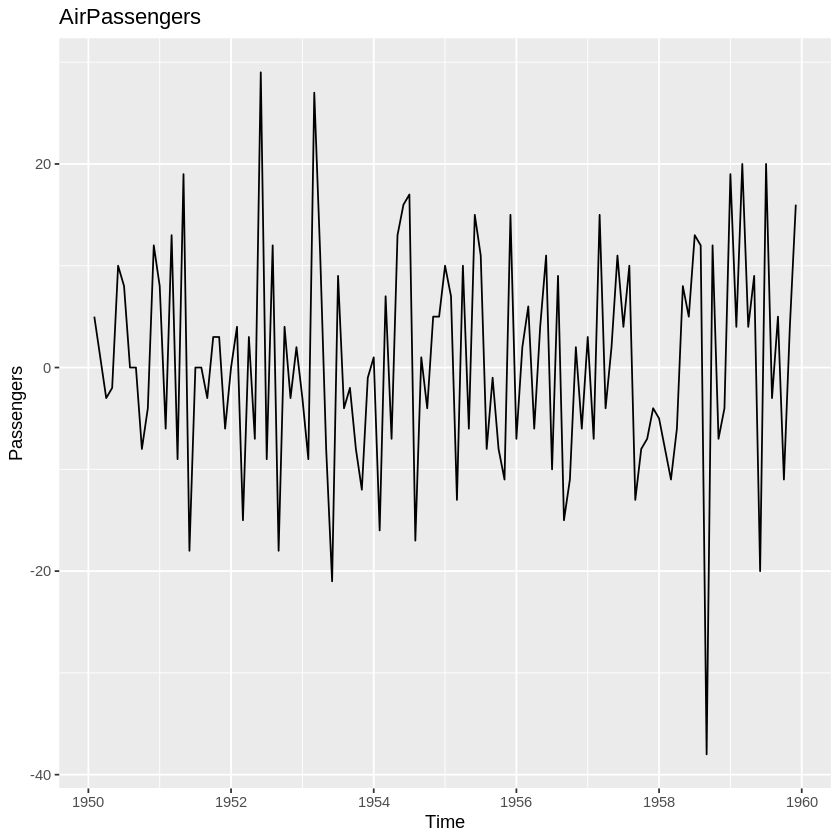

In [ ]:
autoplot(diff(diff(train_data),12)) + ggtitle("AirPassengers") + xlab("Time") + ylab("Passengers")

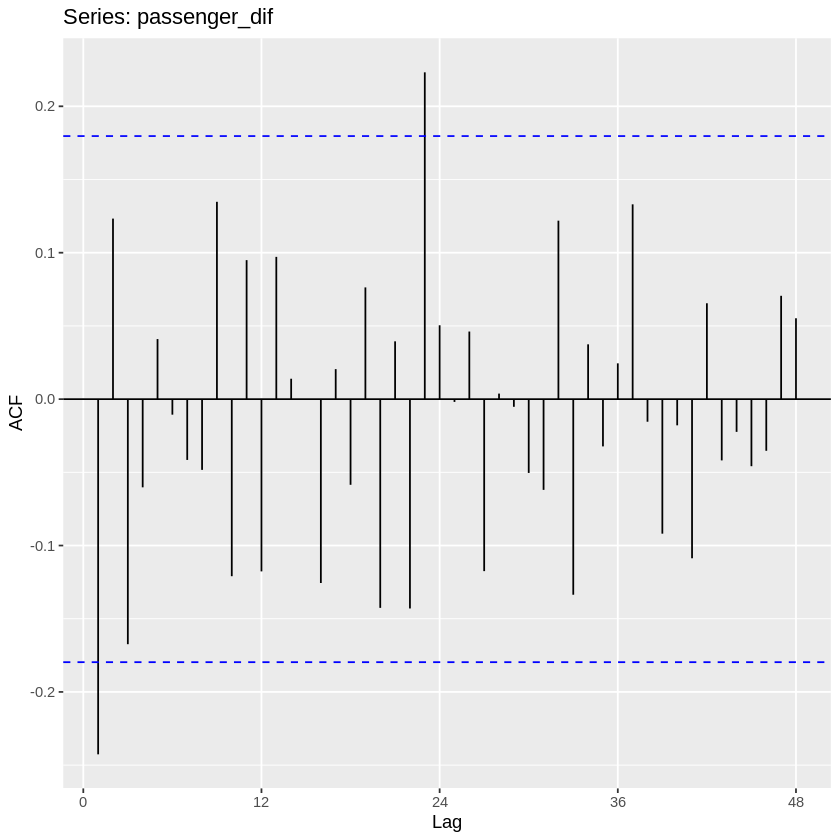

In [ ]:
#ACf
passenger_dif <- diff(diff(train_data),12)
ggAcf(passenger_dif,lag=48)

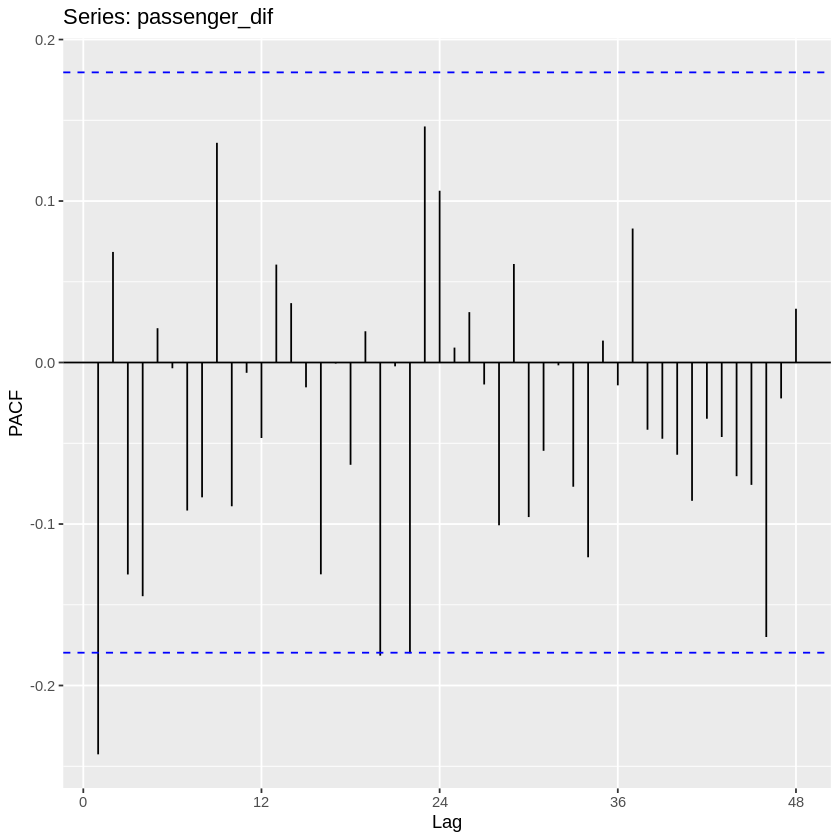

In [ ]:
#PACF:
ggPacf(passenger_dif,lag=48)

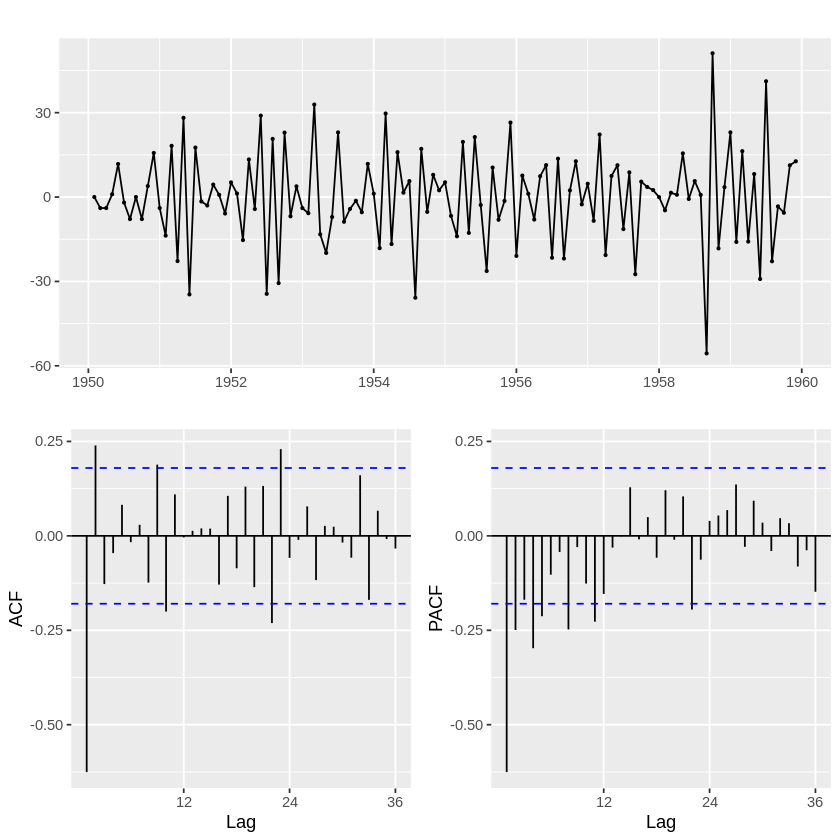

In [ ]:
a <- arima(passenger_dif,order=c(0,1,0),seasonal=c(0,0,1))
ggtsdisplay(residuals(a))

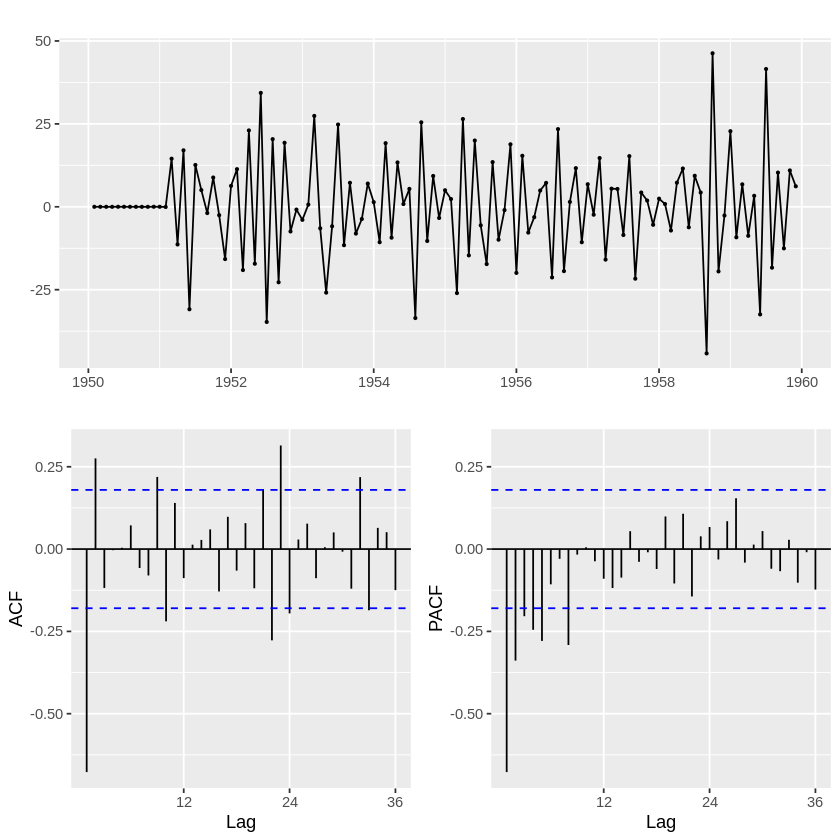

In [ ]:
a <- arima(passenger_dif,order=c(0,1,0),seasonal=c(1,1,1))
ggtsdisplay(residuals(a))

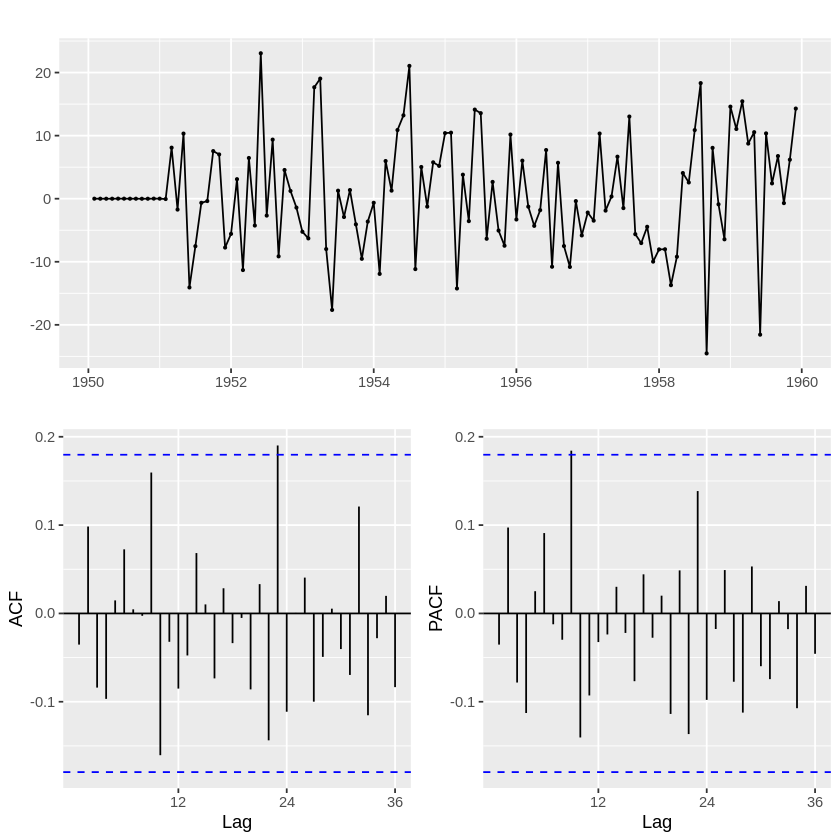

In [ ]:
a <- arima(passenger_dif,order=c(0,1,2),seasonal=c(1,1,1))
ggtsdisplay(residuals(a))

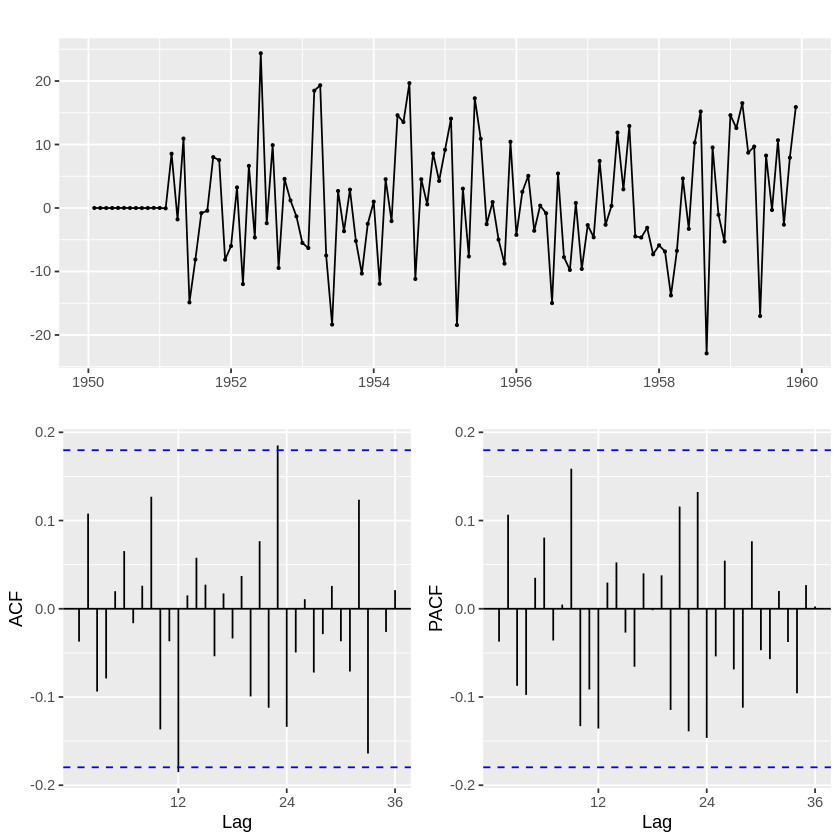

In [ ]:
a <- arima(passenger_dif,order=c(0,1,2),seasonal=c(1,1,2))
ggtsdisplay(residuals(a))

In [ ]:
#Model
model <- arima(passenger_dif,order=c(0,1,2),seasonal=c(1,1,2))


	Ljung-Box test

data:  Residuals from ARIMA(0,1,2)(1,1,2)[12]
Q* = 26.983, df = 19, p-value = 0.105

Model df: 5.   Total lags used: 24



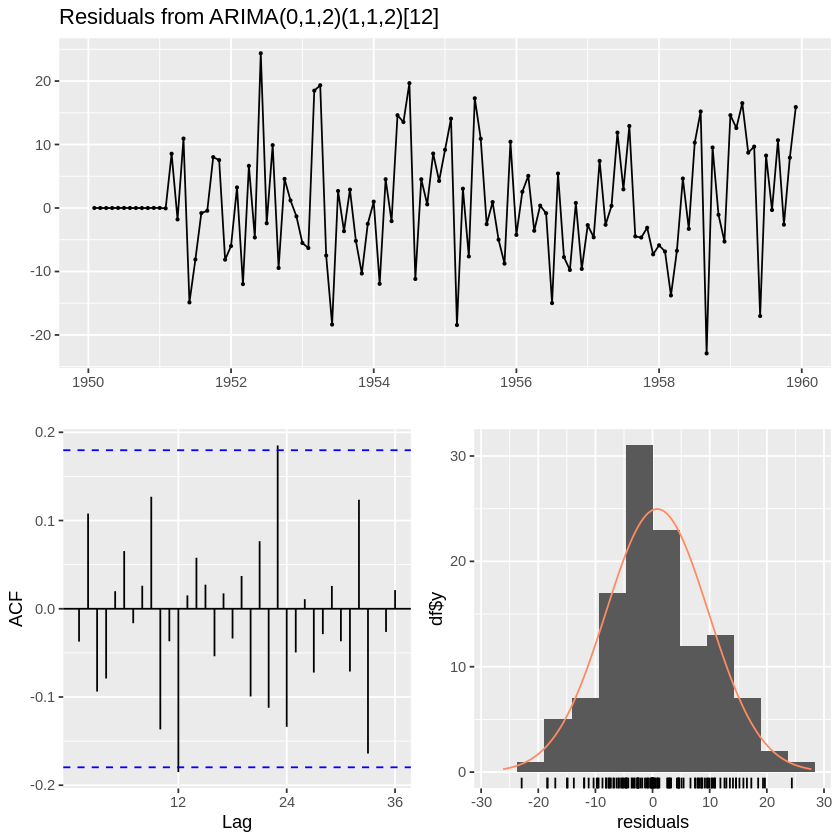

In [ ]:
checkresiduals(model)

In [ ]:
coeftest(model)


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ma1  -1.314792   0.142478 -9.2280 < 2.2e-16 ***
ma2   0.331993   0.089063  3.7276 0.0001933 ***
sar1 -0.979408   0.143468 -6.8267  8.69e-12 ***
sma1 -0.086229   0.351805 -0.2451 0.8063747    
sma2 -0.913750   0.348599 -2.6212 0.0087619 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
summary(forecast(model,h=12))


Forecast method: ARIMA(0,1,2)(1,1,2)[12]

Model Information:

Call:
arima(x = passenger_dif, order = c(0, 1, 2), seasonal = c(1, 1, 2))

Coefficients:
          ma1     ma2     sar1     sma1     sma2
      -1.3148  0.3320  -0.9794  -0.0862  -0.9137
s.e.   0.1425  0.0891   0.1435   0.3518   0.3486

sigma^2 estimated as 90.71:  log likelihood = -408.86,  aic = 829.72

Error measures:
                    ME     RMSE      MAE  MPE MAPE      MASE        ACF1
Training set 0.8126678 8.988836 6.912724 -Inf  Inf 0.5511635 -0.03718844

Forecasts:
         Point Forecast      Lo 80     Hi 80     Lo 95     Hi 95
Jan 1960      -6.057578 -19.063878  6.948722 -25.94900 13.833841
Feb 1960      -2.130430 -15.636420 11.375560 -22.78606 18.525200
Mar 1960       1.125987 -12.381812 14.633785 -19.53241 21.784381
Apr 1960      -2.004400 -15.514006 11.505206 -22.66556 18.656760
May 1960       4.119038  -9.392375 17.630451 -16.54489 24.782962
Jun 1960      10.488305  -3.024916 24.001525 -10.17838 31.154992
J

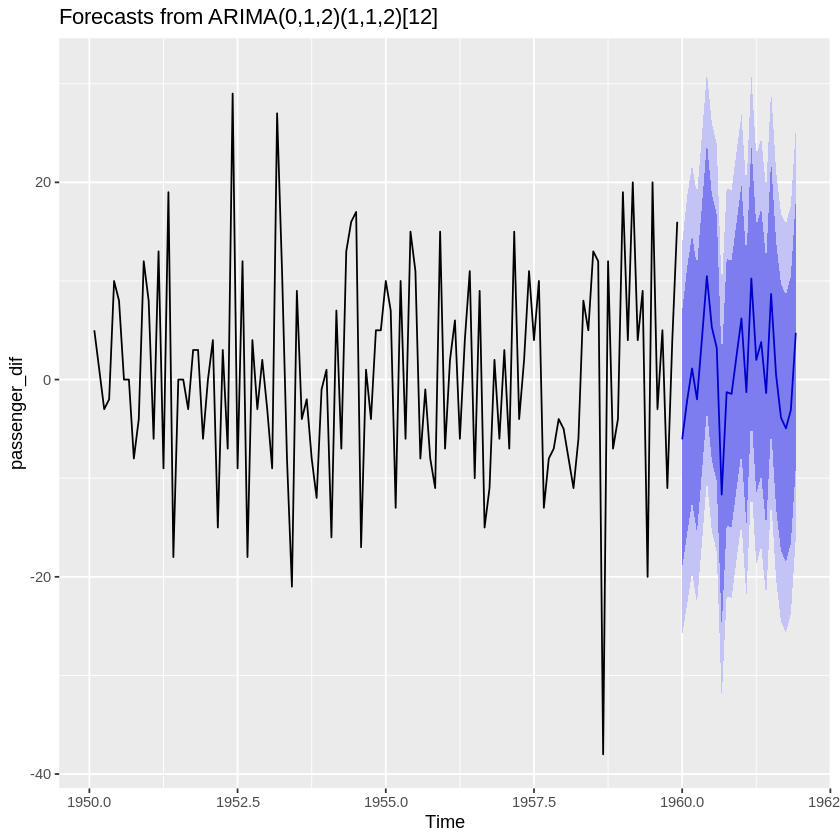

In [ ]:
autoplot(forecast(model),h=12)

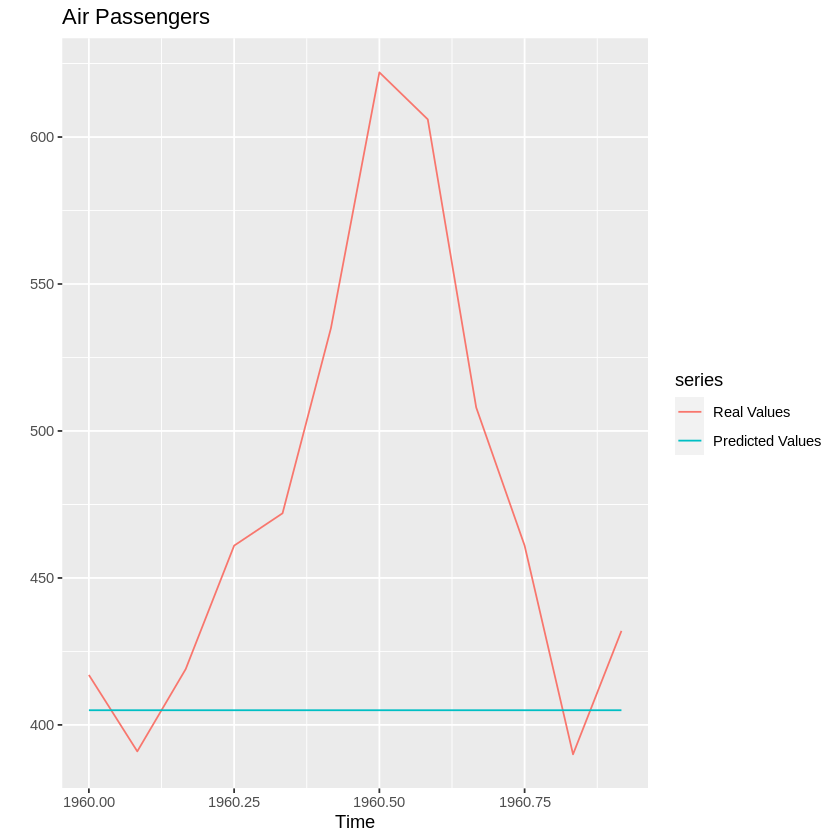

In [ ]:
cbind("Real Values" = test_data, "Predicted Values" = forecast (passenger_ses, h = 12)$mean) %>%
  autoplot() + xlab ("Time") + ylab ("") + ggtitle("Air Passengers")

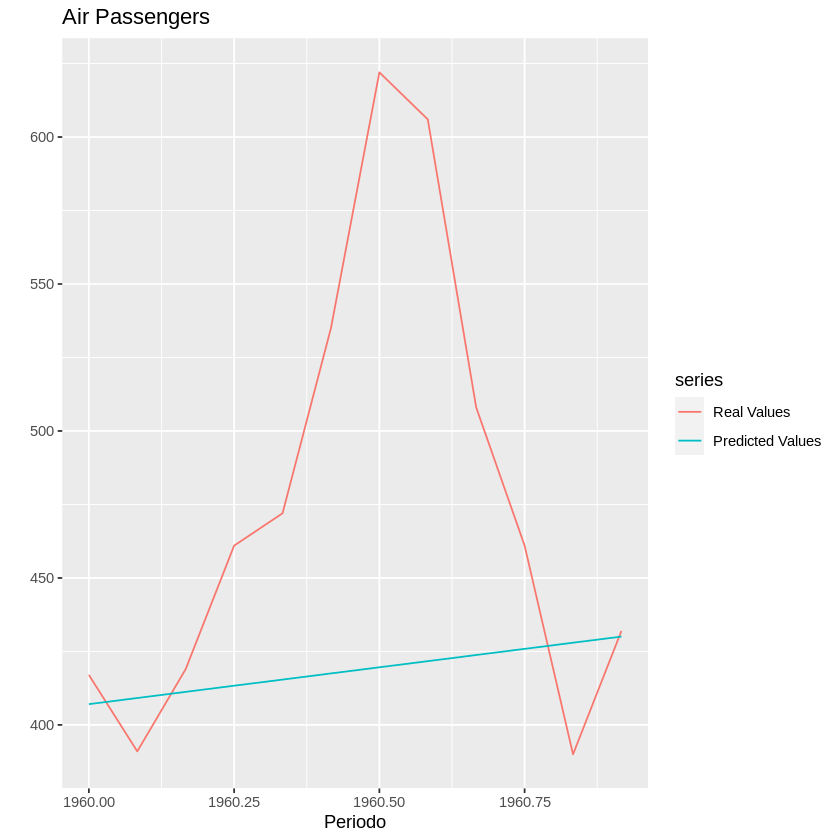

In [ ]:
cbind("Real Values" = test_data, "Predicted Values" = forecast (passenger_sh, h = 12)$mean) %>%
  autoplot() + xlab ("Periodo") + ylab ("") + ggtitle("Air Passengers")

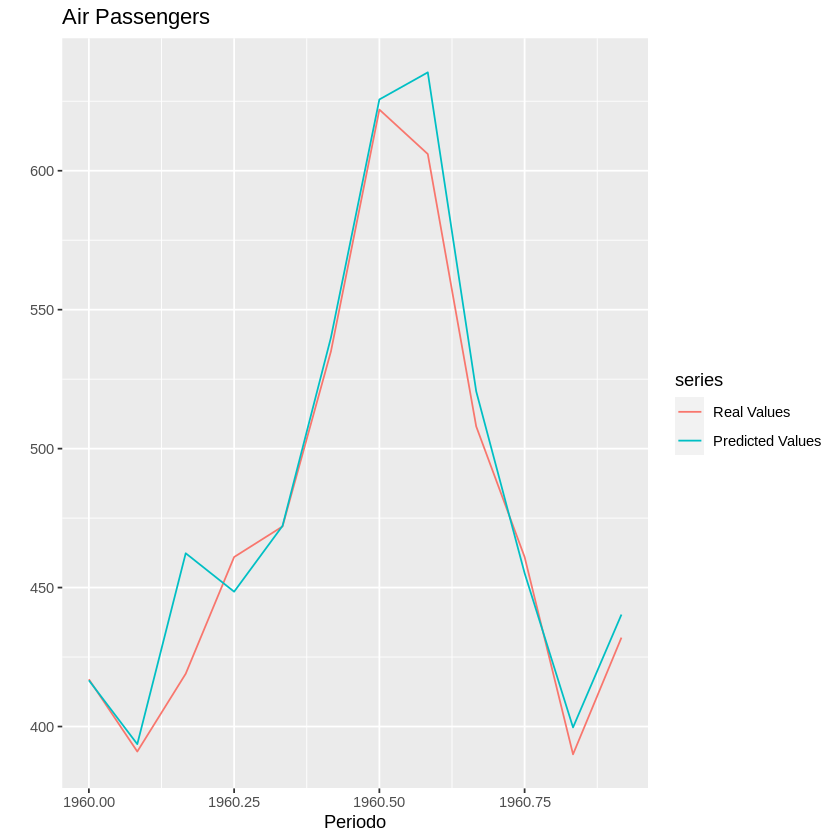

In [ ]:
cbind("Real Values" = test_data, "Predicted Values" = forecast (passenger_hw, h = 12)$mean) %>%
  autoplot() + xlab ("Periodo") + ylab ("") + ggtitle("Air Passengers")

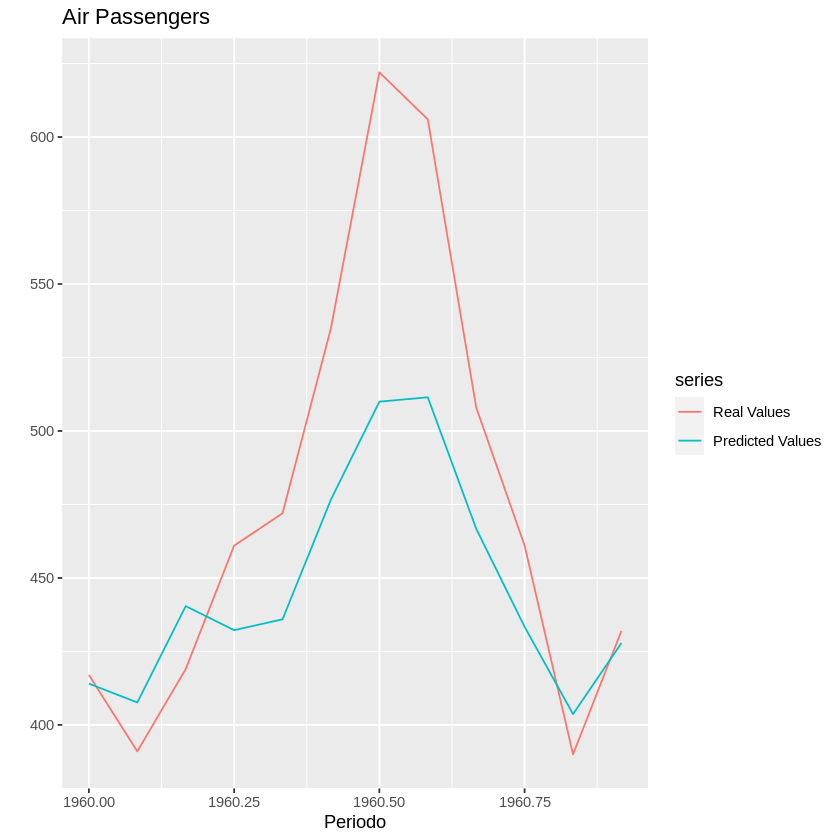

In [ ]:
cbind("Real Values" = test_data, "Predicted Values" = forecast (train_data,model = model ,h = 12)$mean) %>%
  autoplot() + xlab ("Periodo") + ylab ("") + ggtitle("Air Passengers")